# Benchmark

Import the necessary libraries and the queries. 

In [1]:
import os
import json
from whoosh.scoring import BM25F
from doc2vec.doc2vec_model import Doc2VecModel
from sentiment.sentiment_model import SentimentWeightingModel, AdvancedSentimentWeightingModel

import seaborn as sns
import pandas as pd

# file containing benchmark queries
file_path = os.path.join("evaluation", "queries.json")

with open(file_path) as f:
    queries = json.load(f)

# Models that need to be tested. 
models = [
	(BM25F(), "BM25F"),
 	(Doc2VecModel(), "Doc2Vec"),
	(SentimentWeightingModel(), "Base Sentiment"),
	(AdvancedSentimentWeightingModel(), "Advanced Sentiment" ) 
]

In [2]:
indexes = [i for i in range(len(queries))]
print("Benchmark queries' indexes:")
print(' '.join(map(str, indexes)))

Benchmark queries' indexes:
0 1


In [6]:
try:
    examined_q = 0
    print("User Information Need: " + queries[examined_q]["UIN"])
except IndexError as e:
    print(e)
    print("index not valid")

User Information Need: I need an apartment near st james park


c:\Users\Admin\Desktop\ProgettoGestione\venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\ProgettoGestione\venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Desktop\ProgettoGestione\venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(-0.05, 1.05)

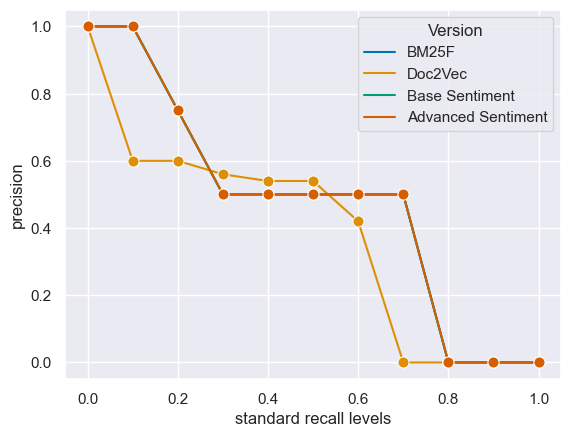

In [12]:

from evaluation.functions import Benchmark
b = Benchmark(queries[examined_q])

axes = ["standard recall levels", "precision"]
df = pd.DataFrame()

for model, model_name in models:
    result = b.getResults(20, model)
    SRLValues = b.getSRLValues(
        b.getPrecisionValues(result),
        b.getRecallValues(result)
    )
    #print(SRLValues)
    dfB = pd.DataFrame(SRLValues, columns = axes)
    dfB["Version"] = f'{model_name}'
    
    df = pd.concat([df, dfB])

sns.set_theme()

# create a dataframe for Seaborn

# plot the line graph
pltP = sns.lineplot(data = df, x = 'standard recall levels', y = 'precision', marker='o', markersize=8, 
            hue="Version", palette="colorblind")

# set fixed axes, the semicolon suppress the output
pltP.set_xlim([-0.05, 1.05])
pltP.set_ylim([-0.05, 1.05])
    